# Model Evaluation and Refinement


### Objectives

   - Evaluate and refine prediction models
   
<b>Tables of Contents</b>

   - Model Evaluation
   - Over-fitting, Under-fitting and Model Selection
   - Ridge Regression
   - Grid Search

In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\Python Learning\pandas-project\Data Analysis with python\Task 5 Model Evaluation automobile pricing\automobileEDA.csv")

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
# Let's use numeric data only

df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


# Functions for plotting


In [5]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName,Title):
    width = 12
    height = 6
    plt.figure(figsize=(width,height))
    
    
    ax1 = sns.kdeplot(RedFunction, color = 'r',label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color = 'b', label = BlueName, ax = ax1)
    
    
    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [6]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 6
    plt.figure(figsize=(width,height))
    
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro',label ='Training Data')
    plt.plot(xtest, y_test, 'go', label = 'Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label = 'Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()

# Part 1: Training and Testing

<b> Split data into training and testing data.</b>

In [7]:
y_data = df['price']
y_data.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [8]:
# drop price data in dataframe x_data

x_data = df.drop('price',axis =1)
x_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1


Now, we randomly split our data into training and testing data using the function <b>train_test_split.</b>


x_data = independent variable
y_data = dependent dataset
x_train, y_train = part of available data as training set
x_test, y_test = part of available data as testing set
test_size = 0.10, percentage of testing data
random_state = number generator used for random sampling

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.10, random_state  = 1)

print("Number of test sample: ",x_test.shape[0])
print("Number of train sample: ",x_train.shape[0])

Number of test sample:  21
Number of train sample:  180


In [10]:
# Let's import linear regression from the module linear_model
from sklearn.linear_model import LinearRegression

In [11]:
lre = LinearRegression()

In [12]:
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [13]:
# Let's calculate R^2 on the test data

lre.score(x_test[['horsepower']],y_test)



0.36358755750788263

In [14]:
# Let's calculate R^2 on train data

lre.score(x_train[['horsepower']],y_train)

0.6619724197515104

We can see the R^2 is much smaller using the test data compared to the training data.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".</b>

</div>

In [19]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.4, random_state=0)

print("Number of test sample: ",x_test1.shape[0])
print("Number of train sample: ",x_train1.shape[0])

Number of test sample:  81
Number of train sample:  120


In [20]:
# Find the R^2 on test data using 40% of dataset for testing

lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

# Cross-Validation Score

Sometimes we do not have sufficient testing data; as a result, we may want to perform cross-validation. Let's go over methods that we can use for cross-validation.

Let's import <b>cross_val_score</b> from the module <b>model_selection</b>


In [15]:
from sklearn.model_selection import cross_val_score

In [22]:
scores = cross_val_score(lre, x_data[['horsepower']],y_data, cv = 4)

In [23]:
scores

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [24]:
print("The mean of folds are: ",scores.mean()," and the standard deviation is: ",scores.std())

The mean of folds are:  0.522009915042119  and the standard deviation is:  0.29118394447560286


We input the object, the features ('horsepower'), and the target data (y_data). The parameter 'cv' determines the number of folds i.e. cv = 4, in this case.

# Question 3

<b> Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing 'horsepower' features</b>

In [25]:
Rc = cross_val_score(lre, x_data[['horsepower']],y_data,cv=2)
Rc

array([0.59015621, 0.44319613])

In [26]:
Rc.mean()

0.5166761697127429

We can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. 

In [16]:
from sklearn.model_selection import cross_val_predict

In [28]:
yhat = cross_val_predict(lre, x_data[['horsepower']],y_data, cv = 4)
yhat[0:4]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306])

# Part 2: Overfitting, Underfitting and Model Selection

It turns out that the test data, sometimes referred to as the 'out of sample data' is a much better measure of how well our model performs in real world. One reason for this is overfitting.

It turns out these difference are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

In [17]:
lr = LinearRegression()
lr

LinearRegression()

In [12]:
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)


LinearRegression()

In [14]:
yhat_train = lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:4]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983])

In [15]:
yhat_test = lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:4]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278])

Let's perform some model evaluation using our training and testing data seperately

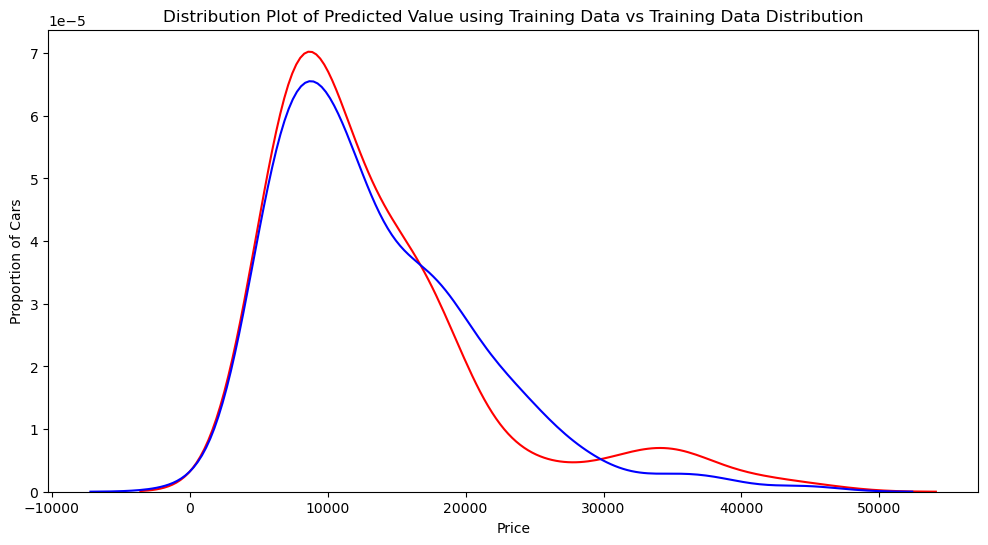

In [20]:
Title = 'Distribution Plot of Predicted Value using Training Data vs Training Data Distribution'

DistributionPlot(y_train, yhat_train, "Actual Value(Train)","Predicted Values(Train)",Title)

So far model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

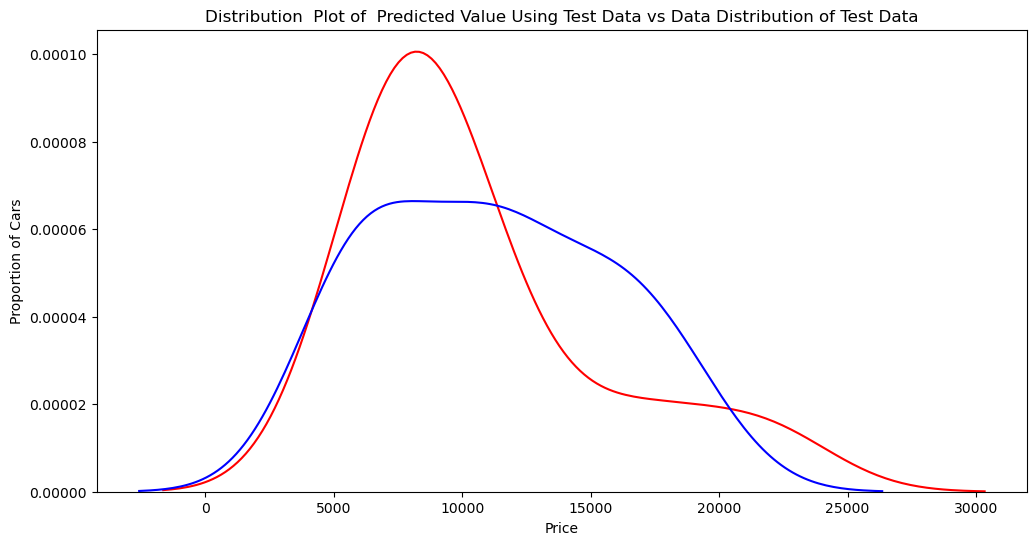

In [21]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing fig 1 and fig 2, it is evident that the distribution of the test data in fig 1 is much better at fitting data. This difference in fig 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extermely different. Let's see if polynomial regression also exhibits a drops in the prediction accuracy when analysing the test dataset.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

## Overfitting

Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model doesnot perform as well since it is modelling noise, not the undelying process that generate the relationship. Let's create a degree 5 polynomial model

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.45, random_state =0)

In [42]:
# degree 5 polynomial transformation on the feature 'horsepower'
pr = PolynomialFeatures(degree=5)

x_train_pr = pr.fit_transform(x_train[['horsepower']])

x_test_pr = pr.fit_transform(x_test[['horsepower']])

pr

PolynomialFeatures(degree=5)

In [43]:
# Let's create a linear regression model 'poly' and train it
poly = LinearRegression()

poly.fit(x_train_pr,y_train)

LinearRegression()

In [44]:

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.58615619,  7307.91973653, 12213.73734432, 18893.37966315,
       19996.10669225])

In [45]:
print('The predicted values: ',yhat[0:4])
print('The True vales: ',y_test[0:4].values)

The predicted values:  [ 6728.58615619  7307.91973653 12213.73734432 18893.37966315]
The True vales:  [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

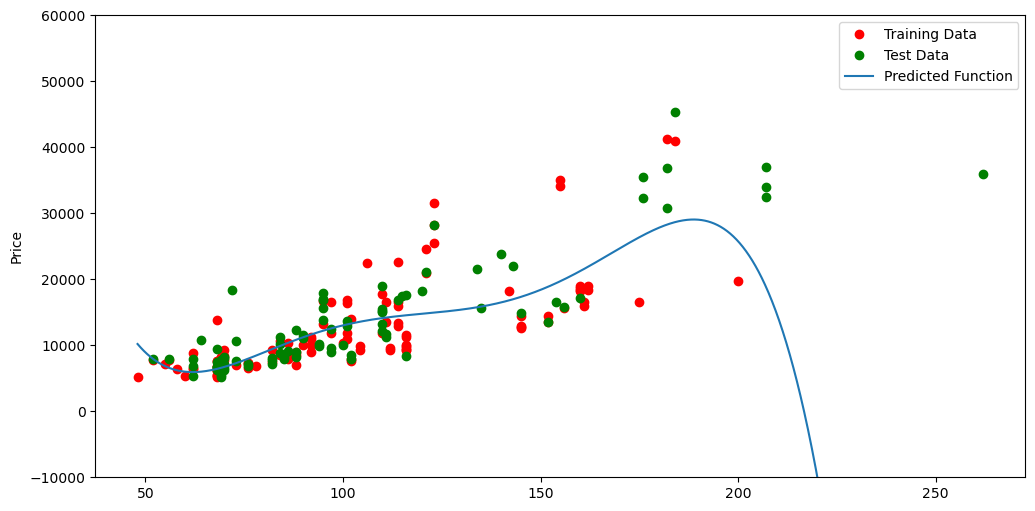

In [31]:
PollyPlot(x_train['horsepower'],x_test['horsepower'],y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


In [46]:
# R^2 of the training data

poly.score(x_train_pr, y_train)

0.5567716897727109

In [47]:
# R^2 of the test data

poly.score(x_test_pr, y_test)

-29.870994900857237

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for the different order polynomials and then plot the results.

Text(3, 0.75, 'Maximum R^2 ')

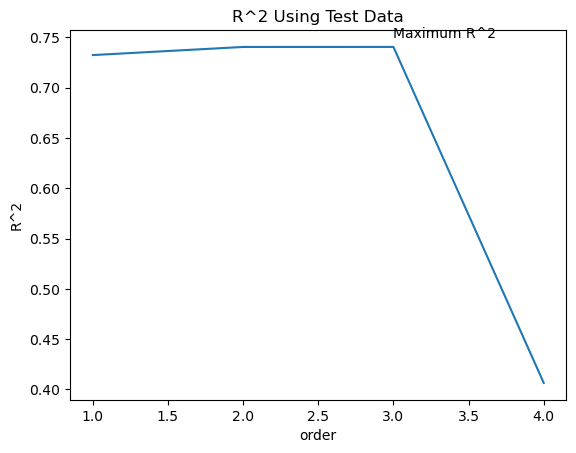

In [48]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order thee polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial

In [37]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_data, random_state = 0)
    pr= PolynomialFeatures(degree = order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train['horsepower'],x_test['horsepower'],y_train,y_test, poly,pr)

# Question

<b>We can perform polynomial transformations with more than one feature. Create a 'PolynomialFeatures' object 'pr1' of degree two. 

In [39]:
pr1 = PolynomialFeatures(degree = 2)

In [41]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])

x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])


In [42]:
x_train_pr1.shape

(110, 15)

In [43]:
# Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features
poly1 = LinearRegression().fit(x_train_pr1,y_train)
poly1

LinearRegression()

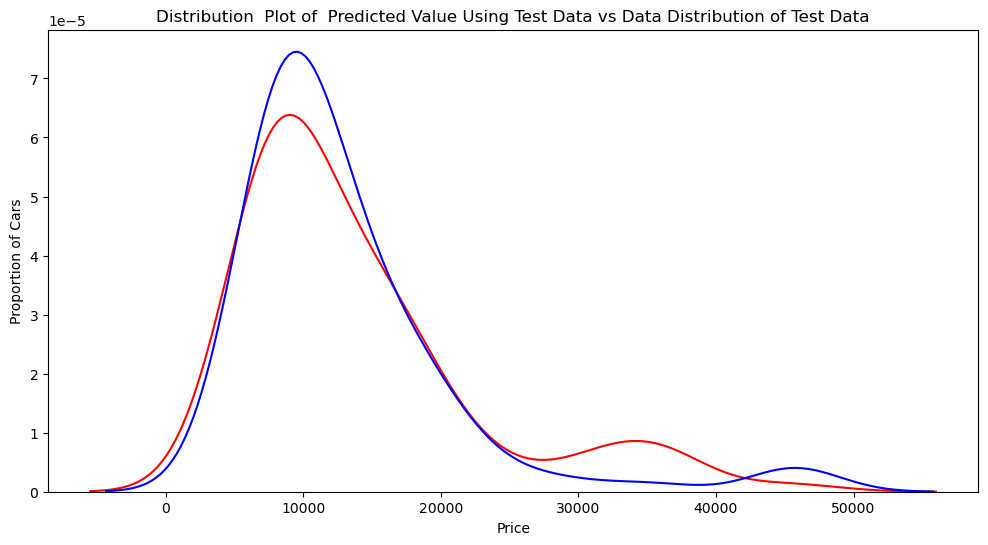

In [44]:
yhat_test1 = poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted value is higher than actual value for cars where the price  10,000  range, conversely the predicted price is lower than the price cost in the  30,000 to  40,000 range. As such the model is not as accurate in these ranges.

# Ridge Regression

It is the process of regularizing the feature set using the hyperparaeter alpha.

In this section, we will review Ridge Regression and see how the parameter alpha changes the model.

In [20]:
pr = PolynomialFeatures(degree = 2)

x_train_pr = pr.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']])



In [21]:
# Let's import Ridge from linear model

from sklearn.linear_model import Ridge

In [22]:
# Let's create a Ridge regression object, setting the regularization parameter to 0.1
RidgeModel = Ridge(alpha = 1)

In [23]:
RidgeModel.fit(x_train_pr, y_train)

yhat = RidgeModel.predict(x_test_pr)

In [24]:
print('Predcited: ',yhat[0:4])
print('test set: ',y_test[0:4].values)

Predcited:  [ 9514.3818699   6672.42344634 10534.19951249  5506.01891856]
test set:  [ 9549.  6229. 10245.  7295.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [28]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.82it/s, Test Score=0.682, Train Score=0.858]


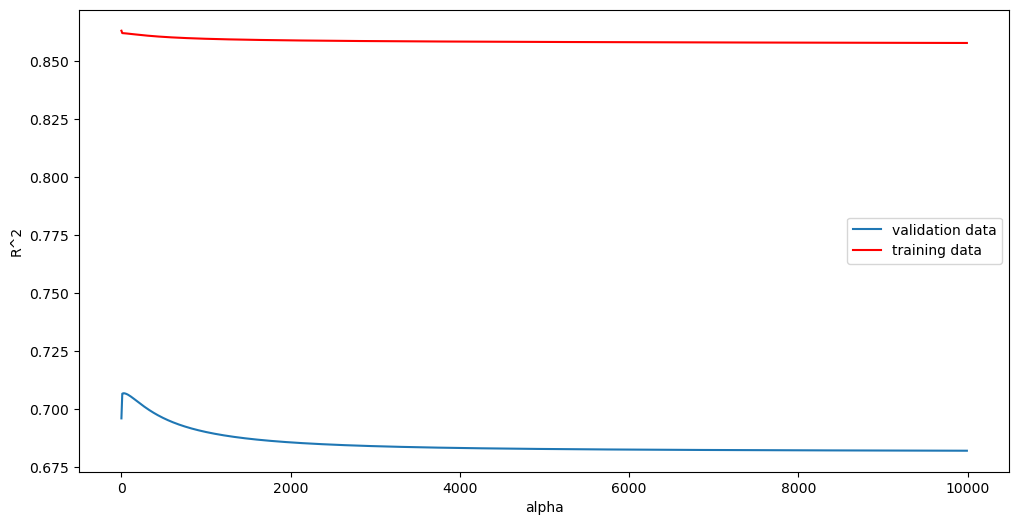

In [30]:
width = 12
height = 6

plt.figure(figsize=(width,height))

plt.plot(Alpha, Rsqu_test, label = 'validation data')
plt.plot(Alpha, Rsqu_train, 'r',label = 'training data')

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

# Question 5):

<b>Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to set the model. The parameter of alpha should be set to 10.</b>

In [31]:
RigeModel = Ridge(alpha= 10)

RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.7066579427638966

# Grid Search

The alpha is hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

Let's import <b>GridSearchCV</b> from the module <b>module_selection</b>

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameters1 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [34]:
# Create a Ridge Regression 
RR = Ridge()
RR

Ridge()

In [35]:
# Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [36]:
# fit the model
Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [37]:
BestRR =Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [38]:
BestRR.score(x_test[['horsepower','curb-weight','engine-size','highway-mpg']],y_test)


0.6373308904159393

## Question 6:

Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:


In [39]:
parameters2 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000]}]

Grid2= GridSearchCV(Ridge(),parameters2, cv=4)
Grid2.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)
best_alpha =Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)

Ridge(alpha=10000)